In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib # font 변환

%matplotlib inline

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
path = "../Resources/"

In [3]:
# csv 파일 불러오기
# pd.read_csv('%s1행정구역_시군구_별__성별_인구수.csv' % path, encoding='euc-kr')
# csv 파일로 새로 저장할 때
#Dead_Cause.to_csv("testfile.csv", mode ='w', encoding='ms949')

In [4]:
# 통계 관련 함수 모음
def data_range(x) :
    return max(x) - min(x)

def quartile(x,p) :
    p_index = int(p * len(x)) 
    return sorted(x) [p_index] 

def interquartile_range(x): 
    return quartile(x,0.75) - quartile(x,0.25)

def mean(x):
    # 평균
    return sum(x) / len(x)

def dot(v,w):
    # 점 리스트 
    return sum(v_i * w_i for v_i, w_i in zip (v,w))

def sum_of_squares(v):
    return dot(v,v)
    
def de_mean(x):
    # 편차
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def standard_deviation(x):
    # 표준편차
    return math.sqrt(variance(x))

def variance(x):
    # 분산
    n = len(x)
    deviations = de_mean(x) # 편차
    return sum_of_squares(deviations) / (n-1)

def covariance(x,y):
    # 공분산
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x,y):
    # 상관관계
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x,y) / stdev_x / stdev_y
    else:
        return 0

In [5]:
# 함수와 전역 변수 모음
MaxCnt = 16

def DrawScatterChart(_xlable, _ylabel, x, y, title, grid = False):
    # x_lable, y_lable, x, y, title, grid
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.scatter(x,y)
    
    # linear regression line
    a,b = np.polyfit(np.array(x), np.array(y), 1)
    f = lambda x: a * x + b
    
    tx = np.array([min(x), max(x)])
    ax.plot(tx,f(tx), c='r')
    
    ax.title.set_text(title)
    ax.set_xlabel(_xlable)
    ax.set_ylabel(_ylabel)
    
    if grid:
        ax.grid()
    
    plt.show()
    
    # 상관관계 값 출력
    print("상관 계수 :", correlation(x,y))
    # 선형방정식 출력
    print("선형방정식 : y= {:.2}x {:+.2}".format(a,b))
    
def DrawBarChart(_xlable, _ylabel, x, y, title, tag, grid = False):
    # append chart tags
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.bar(x,y)
    
    xlen = len(x)
    
    #ax.set_xlim(min(x),max(x))
    #plt.xticks([i for i in x], tags)
    #ax.set_xticks([i for i in x])
    #ax.set_xticklabels(tags)
    
    
    # label 회전
    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    ax.title.set_text(title)
    
    if grid:
        ax.grid()
    
    plt.show()

In [6]:
# csv 파일 불러오기
# 1,2,6 번 리소스 세종시 포함
rc1 = People = pd.read_csv('%s1행정구역_시군구_별__성별_인구수.csv' % path, encoding='euc-kr')
rc2 = Car= pd.read_csv('%s2_1인당_자동차_등록대수_시도_시_군_구.csv'% path, encoding='euc-kr')
rc3 = emergencyTime = pd.read_csv('%s3발병_후_응급실_도착_소요시간_현황_시도별.csv' % path, encoding='euc-kr')
rc4 = emergencyZinryo = pd.read_csv('%s4응급진료결과_현황_시도별.csv'% path, encoding='euc-kr')
rc5 = Medic = pd.read_csv('%s5보건의료기관_소재지_및_종류별_활동_보건의료인력수.csv' % path, encoding='euc-kr')
rc6 = Eungp = pd.read_csv('%s6응급의료기관_및_응급의료기관외_응급실_운영기관_수_시도별.csv' % path, encoding='euc-kr')

# 예외 처리
rc1.drop(9, inplace=True)
rc2.drop(8, inplace=True)
rc6.drop(9, inplace=True)

# 서울 ~ 제주 지역 이름, 세종 제외
area = rc6['지역별(1)'][2:].values

In [7]:
# TotalDataSet Setting
TotalDataSet = pd.DataFrame()
TotalDataSet['지역별'] = area
TotalDataSet['인원'] = np.array(rc1['2015. 12'][2:].values, dtype=int)
TotalDataSet['인당 차량보유수']=np.array(rc2['2015'][1:].values, dtype=float)
TotalDataSet['30분 미만'] = np.array(rc3['2015.1'][2:].values, dtype=int)
TotalDataSet['이송 중 사망자 수'] = np.array(rc4['2015.9'][3:].values, dtype=int)
TotalDataSet['응급 의료 기관 수'] = np.array(rc6['2015'][2:].values, dtype=int)

In [8]:
TotalDataSet

지역별        인원  인당 차량보유수  30분 미만  이송 중 사망자 수  응급 의료 기관 수
0   서울  10022181      0.30  121894        3620          68
1   부산   3513777      0.36   15103         134          39
2   대구   2487829      0.44   14394         290          28
3   인천   2925815      0.46   31787         650          21
4   광주   1472199      0.42   16136         179          24
5   대전   1518775      0.42   21327         319          11
6   울산   1173534      0.45    5685          80          13
7   경기  12522606      0.39  112453        3172          91
8   강원   1549507      0.45   17090         825          28
9   충북   1583952      0.46   14148         460          21
10  충남   2077649      0.47   19708         548          22
11  전북   1869711      0.45   13821         435          23
12  전남   1908996      0.47   12003         331          50
13  경북   2702826      0.48   31129        1064          37
14  경남   3364702      0.46   22193         308          61
15  제주    624395      0.70   17724         426           7

In [9]:
# DataSet1_6 Setting
DataSet1_6 = pd.DataFrame()
DataSet1_6['지역별'] = area
DataSet1_6['응급 의료 기관 수'] = TotalDataSet['응급 의료 기관 수']
DataSet1_6['인원'] = TotalDataSet['인원']

In [10]:
# DataSet3_6 Setting
DataSet3_6 = pd.DataFrame()
DataSet3_6['지역별'] = area
DataSet3_6['응급 의료 기관 수'] = TotalDataSet['응급 의료 기관 수']
DataSet3_6['30분 미만'] = TotalDataSet['30분 미만']

In [11]:
# DataSet 4_6 Setting
DataSet4_6 = pd.DataFrame()
DataSet4_6['지역'] = rc6['지역별(1)'][2:].values
DataSet4_6['응급 의료 기관 수'] = np.array(rc6['2015'][2:].values, dtype=int)
# 세종 제외
DataSet4_6['이송 중 사망자 수'] = np.array(rc4['2015.9'][3:].values, dtype=int)

In [12]:
# DataSet1_3 Setting
DataSet1_3 = pd.DataFrame()
DataSet1_3['지역별'] = area

DataSet1_3['응급 의료 기관 수'] = TotalDataSet['응급 의료 기관 수']
DataSet1_3['인원'] = TotalDataSet['인원']
DataSet1_3['인당 차량보유수']= TotalDataSet['인당 차량보유수']

tempList= [DataSet1_3['인원'][i] * DataSet1_3['인당 차량보유수'][i] for i in range(MaxCnt)]

DataSet1_3['지역별 차량수']= tempList

In [21]:
# DataSet1_3_3DataSet1_3_3g
DataSet1_3_3 =pd.DataFrame()
DataSet1_3_3['지역별'] = area

DataSet1_3_3['30분 미만'] = TotalDataSet['30분 미만']
DataSet1_3_3['지역별 차량수']= DataSet1_3['지역별 차량수']

#무사 도착 환자수, DOA

DataSet3_4=pd.DataFrame()
DataSet3_4['30분 미만']=TotalDataSet['30분 미만']
DataSet3_4['이송 중 사망자 수']=np.array(rc4['2015.9'][3:].values, dtype=int)

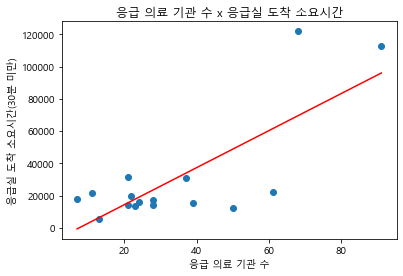

상관 계수 : 0.7647129591500786
선형방정식 : y= 1.2e+03x -8.7e+03


(None,)

In [22]:
# DataSet3_6 그래프
DrawScatterChart("응급 의료 기관 수","응급실 도착 소요시간(30분 미만)",  DataSet3_6['응급 의료 기관 수'].values, DataSet3_6['30분 미만'].values,'응급 의료 기관 수 x 응급실 도착 소요시간'),

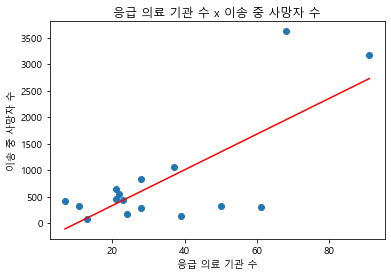

상관 계수 : 0.7401156086694238
선형방정식 : y= 3.4e+01x -3.4e+02


(None,)

In [15]:
# DataSet4_6 그래프
DrawScatterChart("응급 의료 기관 수","이송 중 사망자 수",  DataSet4_6['응급 의료 기관 수'].values, DataSet4_6['이송 중 사망자 수'].values,'응급 의료 기관 수 x 이송 중 사망자 수'),

In [16]:
#DataSet1_6.sort_values(by=['인원'])

In [17]:
DrawScatterChart("인원 수","응급실 수", DataSet1_6['인원'].values, DataSet1_6['응급 의료 기관 수'].values, '인원 x 응급실 상관관계')

상관 계수 : 0.8709596430306047
선형방정식 : y= 6.1e-06x +1.4e+01


In [18]:
DrawScatterChart('인원수','지역별 차량수',DataSet1_3['인원'].values, DataSet1_3['지역별 차량수'].values, '인원 x 지역별 차량수 상관관계')

상관 계수 : 0.9821131778946582
선형방정식 : y= 0.34x +2.1e+05


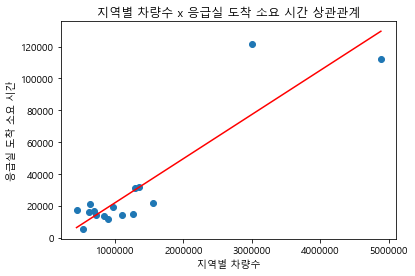

상관 계수 : 0.9086947999497157
선형방정식 : y= 0.028x -5.6e+03


In [19]:
DrawScatterChart('지역별 차량수','응급실 도착 소요 시간', DataSet1_3_3['지역별 차량수'].values, DataSet1_3_3['30분 미만'].values, '지역별 차량수 x 응급실 도착 소요 시간 상관관계')

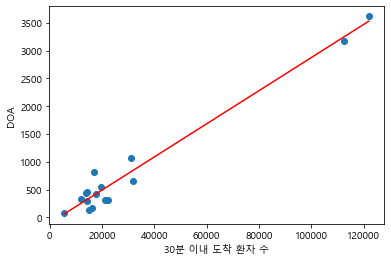

상관 계수 : 0.9838941937996792
선형방정식 : y= 0.03x -1e+02


In [23]:
DrawScatterChart('30분 이내 도착 환자 수','DOA',DataSet3_4['30분 미만'].values, DataSet3_4['이송 중 사망자 수'].values, '')
